In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [2]:
import os

folder_path = r"C:\Users\sruth\Downloads\Health Care Fraudulent"


# Check if the folder path exists
if os.path.exists(folder_path):
    # Get a list of all files in the folder along with their full paths
    file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
    
    # Print the list of file paths
    for file_path in file_paths:
        print(file_path)
else:
    print("The specified folder path does not exist.")

C:\Users\sruth\Downloads\Health Care Fraudulent\test
C:\Users\sruth\Downloads\Health Care Fraudulent\train


In [3]:
test_path=folder_path+"/test"
train_path=folder_path+"/train"
train_folder,test_folder=[],[]
if os.path.exists(train_path):
    for file in os.listdir(train_path):
        train_folder.append(file)
if os.path.exists(test_path):
    for file in os.listdir(test_path):
        test_folder.append(file)

In [4]:
Train=pd.read_csv(train_path+"/"+train_folder[0])
Train_Beneficiarydata=pd.read_csv(train_path+"/"+train_folder[1])
Train_Inpatientdata=pd.read_csv(train_path+"/"+train_folder[2])
Train_Outpatientdata=pd.read_csv(train_path+"/"+train_folder[3])

# Merging data

In [5]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [6]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

In [7]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train,on="Provider")

In [8]:
Train_Allpatientdata.shape

(558211, 55)

In [9]:
Train_Allpatientdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [52]:
Train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

# Physician cols preprocessing

In [11]:
a=(Train_Allpatientdata["AttendingPhysician"]==Train_Allpatientdata["OperatingPhysician"])
b=(Train_Allpatientdata["OperatingPhysician"]==Train_Allpatientdata["OtherPhysician"])
c=(Train_Allpatientdata["AttendingPhysician"]==Train_Allpatientdata["OtherPhysician"])

print(a.sum())
print(b.sum())
print(c.sum())
print( (a+b).sum() ) # atten=oper=other

61164
15884
85258
63872


In [53]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=Train_Allpatientdata.apply(physician_same,axis=1)

In [13]:
Train_Allpatientdata["phy_same"]=phy_same

In [14]:
def physician_count(row,list_count):
    count=0
    for col in list_count:
        if pd.isnull(row[col]):
            continue
        else:
            count+=1
    return count
    
list_count=["AttendingPhysician","OperatingPhysician","OtherPhysician"]
phy_count=Train_Allpatientdata.apply(physician_count,axis=1,args=(list_count,))

In [15]:
Train_Allpatientdata["phy_count"]=phy_count

In [16]:
Train_Allpatientdata.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,0,0,30,50,Yes,3,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,2,0,0,1810,760,Yes,3,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,2,0,0,1810,760,Yes,3,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,2,0,0,1810,760,Yes,3,1


# ClainStartDt , ClainEndDt cols preprocessing

In [17]:
startdate= pd.to_datetime( Train_Allpatientdata["ClaimStartDt"] )
enddate= pd.to_datetime( Train_Allpatientdata["ClaimEndDt"] )

period = ( enddate - startdate).dt.days
Train_Allpatientdata["period"] = period

In [18]:
Train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

## taking copy

In [19]:
copy1=Train_Allpatientdata.copy()

# Cronic code cols preprocessing

In [20]:
cronic_cols_names=copy1.columns[ copy1.columns.str.startswith("ChronicCond") ]
cronic_cols=copy1[   cronic_cols_names   ]
cronic=cronic_cols.replace({2:0})
copy1[   cronic_cols_names   ]=cronic

# Potintial fraud preprocessing

In [21]:
copy1["PotentialFraud"]=copy1["PotentialFraud"].replace({"Yes":1,"No":0})

# gender preprocessing

In [22]:
copy1["Gender"]=copy1["Gender"].replace({2:0})

# Admisson data preprocessing

In [23]:
startadmt= pd.to_datetime( copy1["AdmissionDt"] )
enddatadmt= pd.to_datetime( copy1["DischargeDt"] )

periodadmt = ( enddatadmt - startadmt).dt.days
copy1["periodadmt"] = periodadmt
copy1["periodadmt"]=copy1["periodadmt"].fillna(0)

# RenalDiseaseIndicator preprocessing

In [24]:
copy1["RenalDiseaseIndicator"]=copy1["RenalDiseaseIndicator"].replace({"Y":1})

# patient age preprocessing

In [25]:
birthdate=pd.to_datetime(copy1["DOB"])
enddate=pd.to_datetime(copy1["DOD"])

# cheack whether the patient dead or alife
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alife = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

copy1["age"]=period
copy1["alife"]=alife

In [26]:
copy1.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alife
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,30,50,1,3,1,0,0.0,75,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,0,1810,760,1,3,1,0,0.0,89,1


In [27]:
copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

# means and stds

In [28]:
def groupby(df,by,vars_to_group,methods,col_ident,as_index=True,agg=False):
    if agg:
        grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].agg(methods)
        cols=['_'.join(col) for col in grouped.columns.values]
        cols=[col_ident+"_"+col for col in cols]
        grouped.columns=cols
        return grouped
    
    else:
        concat=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(methods[0])
        cols=[ col_ident+"_"+col+"_"+methods[0] for col in concat.columns ]
        concat.columns=cols
        
        for method in methods[1:]:
            grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(method)
            cols=[col_ident+"_"+col+"_"+method for col in grouped.columns]
            grouped.columns=cols
            concat=pd.concat([concat,grouped],axis=1)
        
        return concat

In [29]:
money_cols=["InscClaimAmtReimbursed","DeductibleAmtPaid","NoOfMonths_PartACov","NoOfMonths_PartBCov",
           "IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt"]

In [30]:
provider_money=groupby(copy1,["Provider"],money_cols,["mean","std"],"provider",
                       True,False)

In [31]:
banel_money=groupby(copy1,["BeneID"],money_cols,["mean","std"],"banel",
                       True,False)

In [32]:
diag1_money=groupby(copy1,["ClmDiagnosisCode_1"],money_cols,["mean","std"],"diag1",
                       True,False)

In [33]:
selected_cols_names=["phy_same","phy_count","period","periodadmt","age","alife","Provider","PotentialFraud"]
selected_cols=copy1[selected_cols_names]

In [34]:
data=pd.concat([selected_cols,provider_money,banel_money,diag1_money],axis=1)

In [35]:
grouped=data.groupby(by=["Provider","PotentialFraud"]).agg("mean").reset_index()

In [36]:
grouped

,Provider,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alife,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,PRV51001,0,2.960000,1.600000,1.440000,1.000000,80.240000,1.000000,4185.600000,213.600000,...,1804.331094,543.045084,3482.066310,161.353027,0.569945,0.424192,12941.552352,1205.297144,2450.076771,661.506672
1,PRV51003,1,2.439394,1.530303,3.674242,2.424242,71.371212,0.992424,4588.409091,502.166667,...,2422.458599,676.313985,4017.871066,260.257069,0.726572,0.653285,12620.604411,1226.306633,3369.338617,848.213675
2,PRV51004,0,2.818792,1.604027,1.429530,0.000000,73.516779,0.993289,350.134228,2.080537,...,2430.017927,694.246881,1536.290845,113.086257,0.667719,0.577420,11016.516937,1111.592405,2972.377916,808.138208
3,PRV51005,1,2.731330,1.599142,1.088412,0.000000,71.783691,0.996567,241.124464,3.175966,...,2195.953526,630.805985,1234.005090,91.141252,0.657071,0.565930,10021.329572,957.701391,2727.944083,737.419878
4,PRV51007,0,2.736111,1.527778,0.958333,0.222222,70.583333,0.986111,468.194444,45.333333,...,2089.969651,606.550334,1519.425993,103.302166,0.626542,0.520122,10565.761429,1126.358206,2486.827069,682.279276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,2.892857,1.464286,2.142857,0.000000,75.285714,1.000000,380.000000,4.642857,...,2770.995487,762.684094,924.661538,88.673186,0.717266,0.575517,11706.835391,989.925167,3092.516228,805.101036
5406,PRV57760,0,2.318182,1.681818,0.318182,0.000000,62.318182,1.000000,216.818182,0.000000,...,1857.020747,551.812490,1182.800362,63.746284,0.738778,0.632455,10087.266945,852.726747,2325.052621,667.813928
5407,PRV57761,0,3.000000,1.609756,1.390244,0.000000,73.268293,0.987805,225.243902,4.512195,...,2409.246660,667.100333,1469.587798,89.369298,0.626573,0.503166,9701.587916,956.791480,2864.403847,730.914731
5408,PRV57762,0,3.000000,1.000000,0.000000,0.000000,69.000000,1.000000,1900.000000,0.000000,...,2332.103825,701.530055,926.436661,146.810805,0.939796,0.000000,10836.121659,798.136760,2327.892739,625.238022


In [37]:
grouped=grouped.fillna(0)

In [38]:
features=grouped.iloc[:,2:]
labels=grouped.iloc[:,1]

In [39]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(features, labels)

In [40]:
scaler = StandardScaler()
featuresstand=scaler.fit_transform(features)

In [41]:
ff=compute_class_weight(class_weight="balanced",classes=np.unique(labels),y=labels)
cw=dict(zip(np.unique(labels),ff))

featuress,labelss=shuffle(featuresstand,labels)
xtrain,xtest,ytrain,ytest = train_test_split(featuress,labelss,test_size=0.2)

In [42]:

xtrain=xtrain.astype(np.float32)
xtest=xtest.astype(np.float32)
ytrain=ytrain.astype(np.float32).to_numpy()
ytest=ytest.astype(np.float32).to_numpy()


ytrain=ytrain.reshape(ytrain.shape+(1,))
ytest=ytest.reshape(ytest.shape+(1,))

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7846, 54)
(1962, 54)
(7846, 1)
(1962, 1)


In [43]:
inpt=tf.keras.layers.Input((xtrain.shape[1]))
d1=tf.keras.layers.Dense(256, activation='relu')(inpt)
d1=tf.keras.layers.Dense(128, activation='relu')(d1)

d2=tf.keras.layers.Dense(1,activation="sigmoid")(d1)

nural_network=tf.keras.Model(inputs=inpt,outputs=d2)

In [44]:
nural_network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      loss='binary_crossentropy'
                    ,metrics=["accuracy"])

history_combined=nural_network.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=128,epochs=300,
                                  class_weight=cw)

Epoch 1/300
62/62 [==============================] - 4s 20ms/step - loss: 0.6109 - accuracy: 0.6597 - val_loss: 0.5130 - val_accuracy: 0.7360
Epoch 2/300
62/62 [==============================] - 1s 10ms/step - loss: 0.4792 - accuracy: 0.7606 - val_loss: 0.4451 - val_accuracy: 0.7956
Epoch 3/300
62/62 [==============================] - 1s 10ms/step - loss: 0.4190 - accuracy: 0.8242 - val_loss: 0.4000 - val_accuracy: 0.8491
Epoch 4/300
62/62 [==============================] - 1s 10ms/step - loss: 0.3792 - accuracy: 0.8501 - val_loss: 0.3703 - val_accuracy: 0.8578
Epoch 5/300
62/62 [==============================] - 1s 10ms/step - loss: 0.3525 - accuracy: 0.8616 - val_loss: 0.3494 - val_accuracy: 0.8609
Epoch 6/300
62/62 [==============================] - 1s 10ms/step - loss: 0.3333 - accuracy: 0.8666 - val_loss: 0.3340 - val_accuracy: 0.8665
Epoch 7/300
62/62 [==============================] - 1s 10ms/step - loss: 0.3182 - accuracy: 0.8734 - val_loss: 0.3227 - val_accuracy: 0.8680
Epoch 

In [45]:
ytt=nural_network.predict(xtest)
dd=np.round(ytt)
print(classification_report(ytest,dd))

62/62 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       982
         1.0       0.93      0.99      0.96       980

    accuracy                           0.96      1962
   macro avg       0.96      0.96      0.96      1962
weighted avg       0.96      0.96      0.96      1962



In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred=dd
y_true=ytest
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

# Classification Report
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Confusion Matrix:
 [[914  68]
 [ 11 969]]
Accuracy: 0.9597349643221202
Precision: 0.9344262295081968
Recall: 0.9887755102040816
F1 Score: 0.960832920178483
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       982
         1.0       0.93      0.99      0.96       980

    accuracy                           0.96      1962
   macro avg       0.96      0.96      0.96      1962
weighted avg       0.96      0.96      0.96      1962



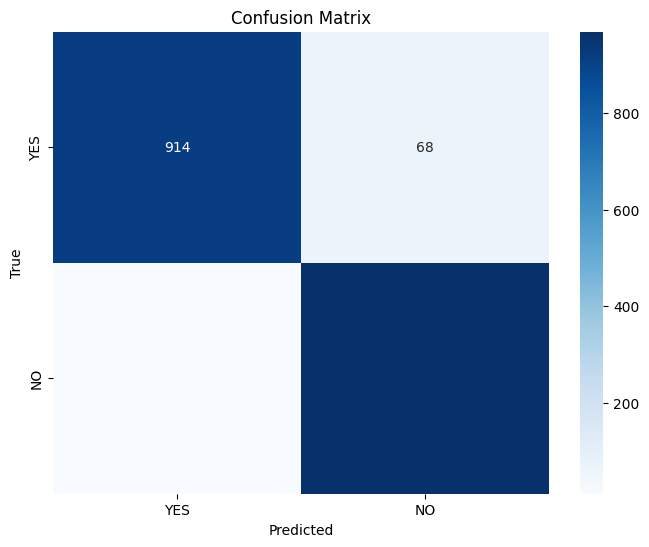

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels (replace with your class labels)
class_labels = ["YES", "NO"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [48]:
import tensorflow as tf
from tensorflow import keras

# Assuming you have your X_train and y_train prepared

# Create a Sequential model
model = keras.Sequential()

# Input layer for 2D data
model.add(keras.layers.Input(shape=(xtrain.shape[1], )))  # Input shape for 2D data

# Dense layers (you can adjust the architecture as needed)
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 300

model.fit(xtrain,ytrain,validation_data=(xtest,ytest), batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/300
62/62 [==============================] - 3s 18ms/step - loss: 0.3802 - accuracy: 0.8264 - val_loss: 0.3029 - val_accuracy: 0.8787
Epoch 2/300
62/62 [==============================] - 1s 9ms/step - loss: 0.2810 - accuracy: 0.8849 - val_loss: 0.2792 - val_accuracy: 0.8838
Epoch 3/300
62/62 [==============================] - 1s 9ms/step - loss: 0.2483 - accuracy: 0.9034 - val_loss: 0.2557 - val_accuracy: 0.9006
Epoch 4/300
62/62 [==============================] - 1s 11ms/step - loss: 0.2274 - accuracy: 0.9136 - val_loss: 0.2377 - val_accuracy: 0.9134
Epoch 5/300
62/62 [==============================] - 1s 10ms/step - loss: 0.2045 - accuracy: 0.9223 - val_loss: 0.2230 - val_accuracy: 0.9139
Epoch 6/300
62/62 [==============================] - 1s 10ms/step - loss: 0.1888 - accuracy: 0.9295 - val_loss: 0.2142 - val_accuracy: 0.9200
Epoch 7/300
62/62 [==============================] - 1s 10ms/step - loss: 0.1804 - accuracy: 0.9317 - val_loss: 0.2109 - val_accuracy: 0.9205
Epoch 8/

In [49]:
ytt=model.predict(xtest)
dd=np.round(ytt)
print(classification_report(ytest,dd))

62/62 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       982
         1.0       0.94      0.99      0.97       980

    accuracy                           0.96      1962
   macro avg       0.97      0.96      0.96      1962
weighted avg       0.97      0.96      0.96      1962



In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred=dd
y_true=ytest
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

# Classification Report
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Confusion Matrix:
 [[919  63]
 [  6 974]]
Accuracy: 0.9648318042813455
Precision: 0.9392478302796529
Recall: 0.9938775510204082
F1 Score: 0.9657907783837383


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       982
         1.0       0.94      0.99      0.97       980

    accuracy                           0.96      1962
   macro avg       0.97      0.96      0.96      1962
weighted avg       0.97      0.96      0.96      1962



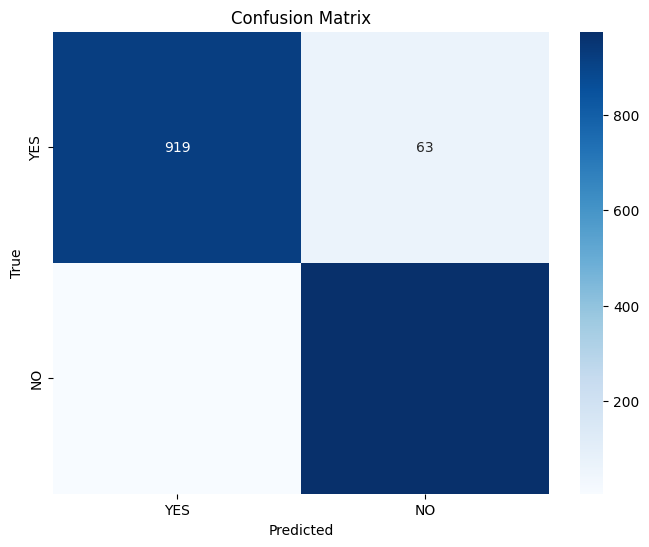

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels (replace with your class labels)
class_labels = ["YES", "NO"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()